# Facebook Data Crawling
After the data is collected, we need to process the data to make it more readable and easier to analyze. We can do some simple visualization to see the data distribution and the relationship between the data. We can also do some simple data cleaning to remove the data that is not needed. In this notebook, we will do some simple data processing on the data we collected from Facebook.

In [1]:
%pip install matplotlib pandas numpy seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [3]:
df1 = pd.read_csv('Data/lans_Reactions4.csv')
df2 = pd.read_csv('Data/anhdaden1.csv')
df3=pd.read_csv('Data/lans_Reactions12.csv')






In [4]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)




df3.dropna(subset=['reactions'], inplace=True)
df2.dropna(subset=['reactions'],inplace=True)
# Giả sử bạn muốn nối theo dòng (axis=0)
df = pd.concat([df2, df1,df3], axis=0, ignore_index=True)
df.dropna(subset=['reactions'], inplace=True)
df

,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,images,...,reactions,reaction_count,with,page_id,sharers,image_id,image_ids,was_live,fetched_time,header
0,894292592055734,Cách này hay nè\n#anhdaden,Cách này hay nè\n#anhdaden,NaN,NaN,2023-11-22 20:30:37,1.700660e+09,https://scontent.fhan14-4.fna.fbcdn.net/v/t39....,https://scontent.fhan14-4.fna.fbcdn.net/v/t39....,['https://scontent.fhan14-4.fna.fbcdn.net/v/t3...,...,"{'thích': 22, 'yêu thích': 1, 'haha': 25}",48,NaN,2035749833398248,NaN,8.942926e+14,['894292568722403'],False,2023-11-22 20:39:50.771920,NaN
1,896394561845537,Mới đầu tháng cháy ví cuối tháng lại cháy ví t...,Mới đầu tháng cháy ví cuối tháng lại cháy ví t...,NaN,NaN,2023-11-22 20:00:01,1.700658e+09,https://scontent.fhan14-3.fna.fbcdn.net/v/t39....,https://scontent.fhan14-3.fna.fbcdn.net/v/t39....,['https://scontent.fhan14-3.fna.fbcdn.net/v/t3...,...,{'thích': 2966},2966,NaN,2035749833398248,NaN,8.963945e+14,['896394458512214'],False,2023-11-22 20:39:54.662762,NaN
2,896334455184881,Hảo xử lý\n#anhdaden,Hảo xử lý\n#anhdaden,NaN,NaN,2023-11-22 19:00:09,1.700654e+09,NaN,https://scontent.fhan14-1.fna.fbcdn.net/v/t15....,[],...,"{'thích': 448, 'yêu thích': 1, 'haha': 510, 'w...",965,"[{'name': 'Bất ngờ ở quanh ta', 'link': '/watc...",2035749833398248,NaN,NaN,[],False,2023-11-22 20:40:00.745006,NaN
3,896323245186002,Không một động tác thừa\n#anhdaden,Không một động tác thừa\n#anhdaden,NaN,NaN,2023-11-22 16:00:06,1.700644e+09,NaN,https://scontent.fhan14-1.fna.fbcdn.net/v/t15....,[],...,"{'thích': 514, 'yêu thích': 1, 'haha': 717, 'w...",1245,NaN,2035749833398248,NaN,NaN,[],False,2023-11-22 20:40:08.117473,NaN
4,894292282055765,Tay nhỏ thì chịu thôi\n#anhdaden,Tay nhỏ thì chịu thôi\n#anhdaden,NaN,NaN,2023-11-22 15:00:44,1.700640e+09,https://scontent.fhan14-1.fna.fbcdn.net/v/t39....,https://scontent.fhan14-1.fna.fbcdn.net/v/t39....,['https://scontent.fhan14-1.fna.fbcdn.net/v/t3...,...,"{'thích': 440, 'haha': 248, 'wow': 2, 'thương ...",709,NaN,2035749833398248,NaN,8.942923e+14,['894292255389101'],False,2023-11-22 20:40:18.902593,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,2803185076654716,"Anh đùa rất vui, mong anh nghỉ cmn việc :))\n#...","Anh đùa rất vui, mong anh nghỉ cmn việc :))\n#...",NaN,NaN,2021-11-25 11:20:32,1.637814e+09,NaN,https://scontent.fhan14-2.fna.fbcdn.net/v/t15....,[],...,"{'thích': 48232, 'yêu thích': 142, 'haha': 597...",110659,NaN,2035749833398248,NaN,NaN,[],False,NaN,NaN
515,2802715326701691,Sẵn sàng tinh thần thép chị em ơi\n#anhdaden,Sẵn sàng tinh thần thép chị em ơi\n#anhdaden,NaN,NaN,2021-11-24 20:25:16,1.637760e+09,NaN,https://scontent.fhan14-2.fna.fbcdn.net/v/t15....,[],...,"{'thích': 5250, 'yêu thích': 22, 'haha': 7259,...",12822,NaN,2035749833398248,NaN,NaN,[],False,NaN,NaN
516,2802563466716877,Ôi thôi xong :))\n#anhdaden,Ôi thôi xong :))\n#anhdaden,NaN,NaN,2021-11-24 17:00:02,1.637748e+09,NaN,https://scontent.fhan14-1.fna.fbcdn.net/v/t15....,[],...,"{'thích': 106743, 'yêu thích': 546, 'haha': 17...",300320,NaN,2035749833398248,NaN,NaN,[],False,NaN,NaN
517,2802537086719515,Trên mạng và ngoài đời 😅\n#anhdaden,Trên mạng và ngoài đời 😅\n#anhdaden,NaN,NaN,2021-11-24 15:24:30,1.637742e+09,NaN,https://scontent.fhan14-4.fna.fbcdn.net/v/t15....,[],...,"{'thích': 122413, 'yêu thích': 974, 'haha': 19...",336696,NaN,2035749833398248,NaN,NaN,[],False,NaN,NaN


In [5]:
df['time'] = pd.to_datetime(df['time'])

# Sắp xếp DataFrame theo thứ tự giảm dần của cột 'time'
df.sort_values(by='time', ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)

df=df.iloc[:317]
df['shares']

0       0
1       0
2      10
3      13
4       5
       ..
312     7
313    19
314    18
315     5
316    19
Name: shares, Length: 317, dtype: int64

In [6]:
import datetime

df['comments_full'] = df['comments_full'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Now, let's try the analysis again
top_commenter = df['comments_full'].apply(lambda x: x[0]['commenter_name'] if x else None).value_counts().idxmax()
top_comment_count = df['comments_full'].apply(lambda x: x[0]['commenter_name'] if x else None).value_counts().max()
print(f"Người bình luận nhiều nhất: {top_commenter} with {top_comment_count} bình luận")

Người bình luận nhiều nhất: Anh Da Đen with 270 bình luận


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19244\1295155231.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comments_full'] = df['comments_full'].apply(lambda x: eval(x) if isinstance(x, str) else x)


In [7]:
df['comment_time'] = pd.to_datetime(df['comments_full'].apply(lambda x: x[0]['comment_time'] if x else None))
comment_per_day = df['comment_time'].dt.date.value_counts().idxmax()
print(f"Ngày có nhiều bình luận nhất: {comment_per_day}")


Ngày có nhiều bình luận nhất: 2023-08-25


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19244\1680439568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comment_time'] = pd.to_datetime(df['comments_full'].apply(lambda x: x[0]['comment_time'] if x else None))


In [8]:
from sklearn.feature_extraction.text import CountVectorizer

comments = df['comments_full'].apply(lambda x: x[0]['comment_text'] if x else None).dropna()
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(comments)

# In ra 10 từ phổ biến nhất
common_words = pd.DataFrame(X.sum(axis=0), columns=vectorizer.get_feature_names_out())
top_words = common_words.T.sort_values(0, ascending=False).head(50)
print("Từ phổ biến nhất trong bình luận:")
print(top_words)


Từ phổ biến nhất trong bình luận:
           0
https    453
shope    400
ee       400
giảm     296
từ       245
đơn      239
voucher  158
0đ       117
50k       66
99k       55
cho       52
là        52
0h        51
ngày      51
ly        40
link      37
lưu       37
ngay      36
mã        34
và        33
tại       32
dùng      32
25        31
tháng     30
12h       30
rebrand   29
200k      29
thì       28
thời      28
có        27
vào       27
50        27
game      26
ns57jc6   26
đây       26
siêu      26
tải       26
100k      26
500k      25
nhập      25
sale      25
trang     25
111k      24
15        24
10        24
199k      23
cả        23
này       22
lúc       21
người     20


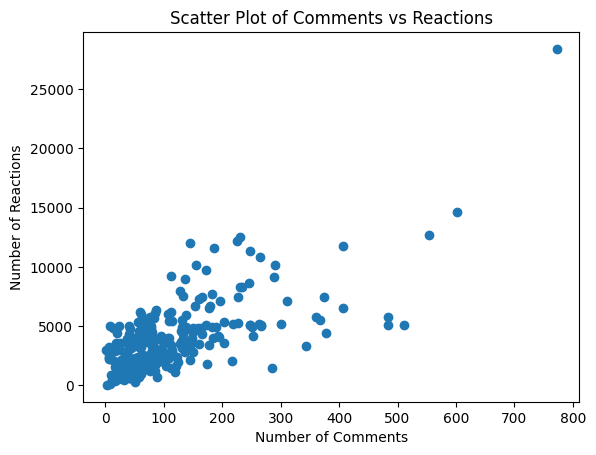

In [9]:
import matplotlib.pyplot as plt

plt.scatter(df['comments'], df['reaction_count'])
plt.title('Scatter Plot of Comments vs Reactions')
plt.xlabel('Number of Comments')
plt.ylabel('Number of Reactions')
plt.show()


In [10]:
correlation_comments_reactions = df['comments'].corr(df['reaction_count'])
print(f'Correlation between Comments and Reactions: {correlation_comments_reactions}')


Correlation between Comments and Reactions: 0.7101347156994324


In [11]:
video_counts = df['video_id'].value_counts()
print('số bài có video ',video_counts.values.sum())


số bài có video  238


In [12]:
# Tổng số lượng reactions theo video và không có video
reactions_by_video = df.groupby('video_id')['reaction_count'].sum()
print(reactions_by_video.mean())


3010.701680672269


In [13]:

# Tính trung bình số lượng reactions cho các bài viết có video
mean_reaction_with_video = df.loc[~df['video_id'].isnull(), 'reaction_count'].mean()

# Tính trung bình số lượng reactions cho các bài viết không có video
mean_reaction_without_video = df.loc[df['video_id'].isnull(), 'reaction_count'].mean()

# In kết quả
print(f"Trung bình số lượng reactions cho bài viết có video: {mean_reaction_with_video}")
print(f"Trung bình số lượng reactions cho bài viết không có video: {mean_reaction_without_video}")


Trung bình số lượng reactions cho bài viết có video: 3010.701680672269
Trung bình số lượng reactions cho bài viết không có video: 5109.822784810127


In [14]:
# Convert string representations of dictionaries to actual dictionaries, handling NaN values
df['reactions'] = df['reactions'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else {})

def get_likes(reactions_dict):
    if isinstance(reactions_dict, dict) and 'thích' in reactions_dict:
        return reactions_dict['thích']
    else:
        return 0

def get_cares(reactions_dict):
    if isinstance(reactions_dict, dict) and 'thương thương' in reactions_dict:
        return reactions_dict['thương thương' ]
    else:
        return 0        

def get_loves(reactions_dict):
    if isinstance(reactions_dict, dict) and 'yêu thích' in reactions_dict:
        return reactions_dict['yêu thích']
    else:
        return 0


def get_sads(reactions_dict):
    if isinstance(reactions_dict, dict) and 'buồn' in reactions_dict:
        return reactions_dict['buồn']
    else:
        return 0

def get_hahas(reactions_dict):
    if isinstance(reactions_dict, dict) and 'haha' in reactions_dict:
        return reactions_dict['haha']
    else:
        return 0

def get_wows(reactions_dict):
    if isinstance(reactions_dict, dict) and 'wow' in reactions_dict:
        return reactions_dict['wow']
    else:
        return 0

def get_shares(reactions_dict):
    if isinstance(reactions_dict, dict) and 'shares' in reactions_dict:
        return reactions_dict['shares']
    else:
        return 0

# Apply the functions to create new columns
df['total_likes'] = df['reactions'].apply(get_likes)
df['total_sads'] = df['reactions'].apply(get_sads)
df['total_hahas'] = df['reactions'].apply(get_hahas)
df['total_wows'] = df['reactions'].apply(get_wows)
df['total_shares'] = df['reactions'].apply(get_shares)
df['total_comments'] = df['reactions'].apply(get_shares)
df['total_loves']=df['reactions'].apply(get_loves)
df['total_cares']=df['reactions'].apply(get_cares)
# Calculate the sum of total reactions
total_likes_sum = df['total_likes'].sum()
total_sads_sum = df['total_sads'].sum()
total_hahas_sum = df['total_hahas'].sum()
total_wows_sum = df['total_wows'].sum()
total_shares_sum = df['total_shares'].sum()
total_comments_sum = df['total_comments'].sum()
total_loves_sum = df['total_loves'].sum()
total_cares_sum = df['total_cares'].sum()
# Print the totals
print(f'Total likes: {total_likes_sum}')
print(f'Total sads: {total_sads_sum}')
print(f'Total hahas: {total_hahas_sum}')
print(f'Total wows: {total_wows_sum}')
#print(f'Total shares: {total_shares_sum}')
print(f'Total comments: {total_comments_sum}')
print(f'Total loves: {total_cares_sum}')
print(f'Total cares: {total_loves_sum}')

Total likes: 576602
Total sads: 17175
Total hahas: 511759
Total wows: 4149
Total comments: 0
Total loves: 1597
Total cares: 8835


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19244\3982778823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reactions'] = df['reactions'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else {})
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19244\3982778823.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_likes'] = df['reactions'].apply(get_likes)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19244\3982778823.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [15]:
most_reacted_post = df.loc[df['reaction_count'].idxmax()]
print(most_reacted_post.post_id)
most_commented_post = df.loc[df['comments'].idxmax()]
print(most_commented_post)
most_shared_post = df.loc[df['shares'].idxmax()]
print(most_shared_post)

889441425874184
post_id                                      889441425874184
text              Đứng nhìn thôi chứ biết sao giờ\n#anhdaden
post_text         Đứng nhìn thôi chứ biết sao giờ\n#anhdaden
shared_text                                              NaN
original_text                                            NaN
                                     ...                    
total_wows                                                47
total_shares                                               0
total_comments                                             0
total_loves                                               41
total_cares                                               25
Name: 47, Length: 61, dtype: object
post_id                                             868649534620040
text              Gia đình này bất ổn thật sự. Giàu có đến như v...
post_text         Gia đình này bất ổn thật sự. Giàu có đến như v...
shared_text                                                     NaN
origi

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19244\2416755481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week_day'] = df['time'].apply(lambda x: week_day[x.weekday()])


Text(0, 0.5, 'Posts')

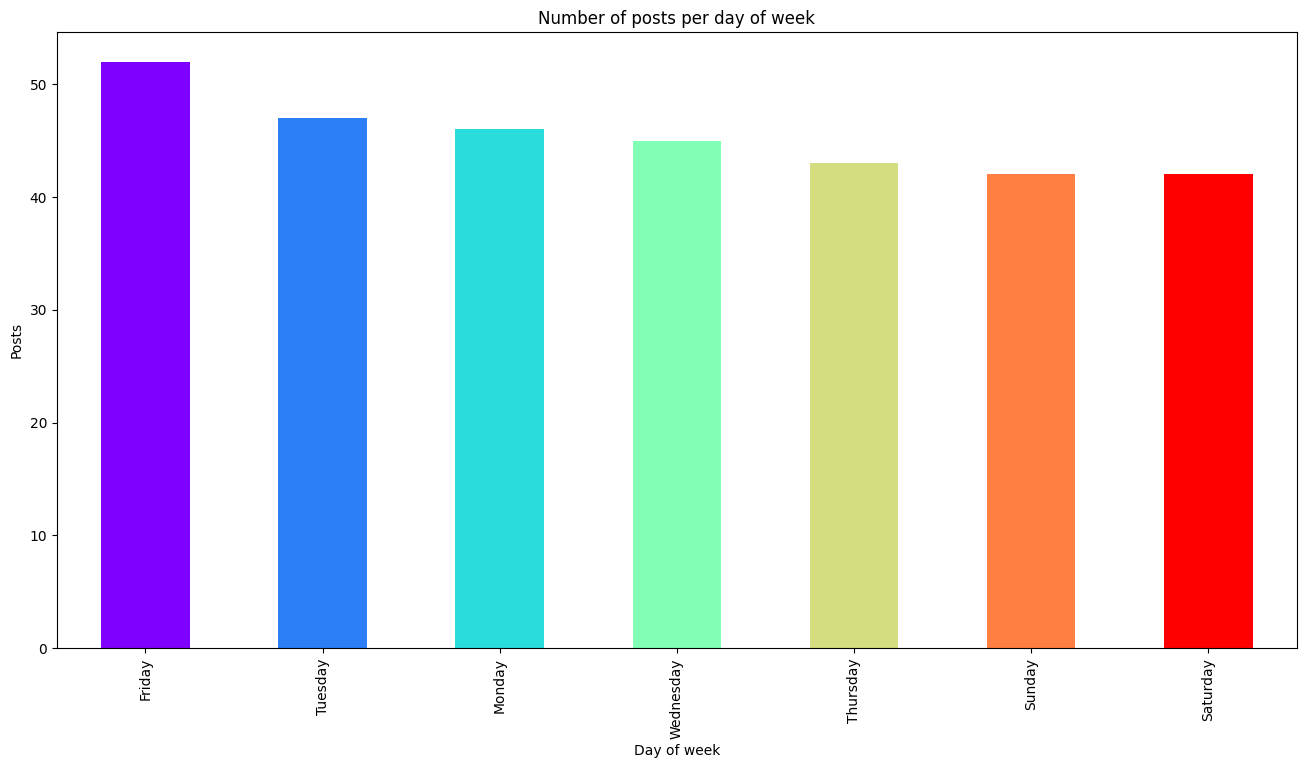

In [16]:
week_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['week_day'] = df['time'].apply(lambda x: week_day[x.weekday()])
import matplotlib.cm as cm

colors = cm.rainbow(np.linspace(0, 1, len(df['week_day'].unique())))
df['week_day'].value_counts().plot(kind='bar', figsize=(16,8), color=colors)
plt.title('Number of posts per day of week')
plt.xlabel('Day of week')
plt.ylabel('Posts')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19244\1130247963.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week_day'] = pd.Categorical(df['week_day'], categories=week_day_order, ordered=True)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or

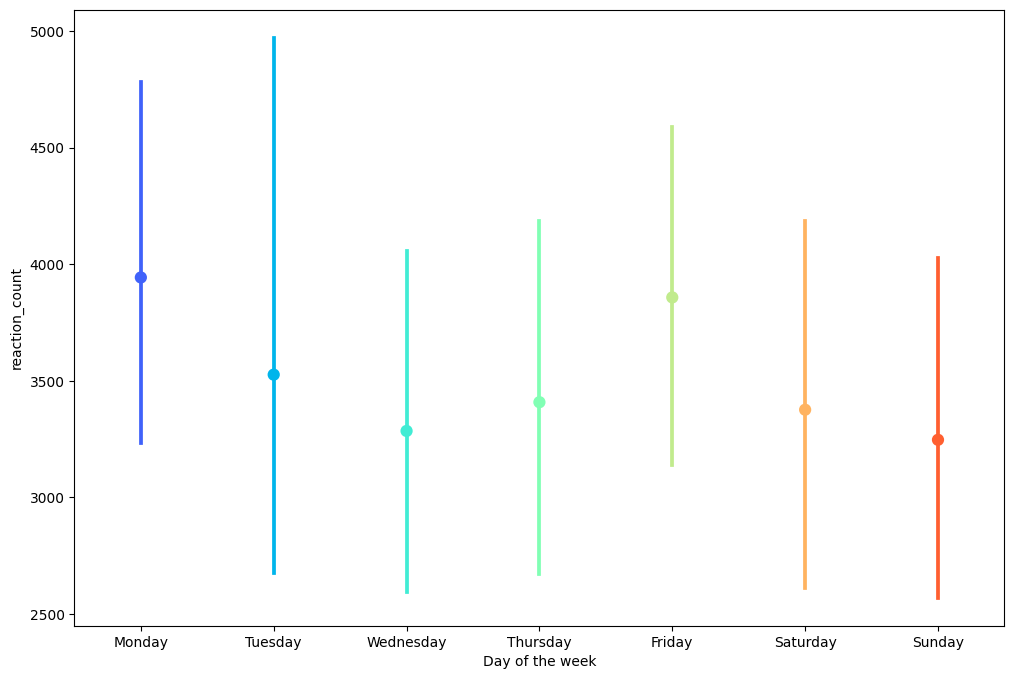

In [17]:
# Convert week_day to categorical variable with correct order of categories
week_day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['week_day'] = pd.Categorical(df['week_day'], categories=week_day_order, ordered=True)

# Create plot
plt.figure(figsize=(12, 8))
sns.pointplot(x='week_day', y='reaction_count', data=df, palette='rainbow')

# Set x-axis label
plt.xlabel('Day of the week')

# Show plot
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19244\2282059857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['time'].dt.hour
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ADMIN\AppData\Local\Programs\P

Text(0.5, 0, 'Hour')

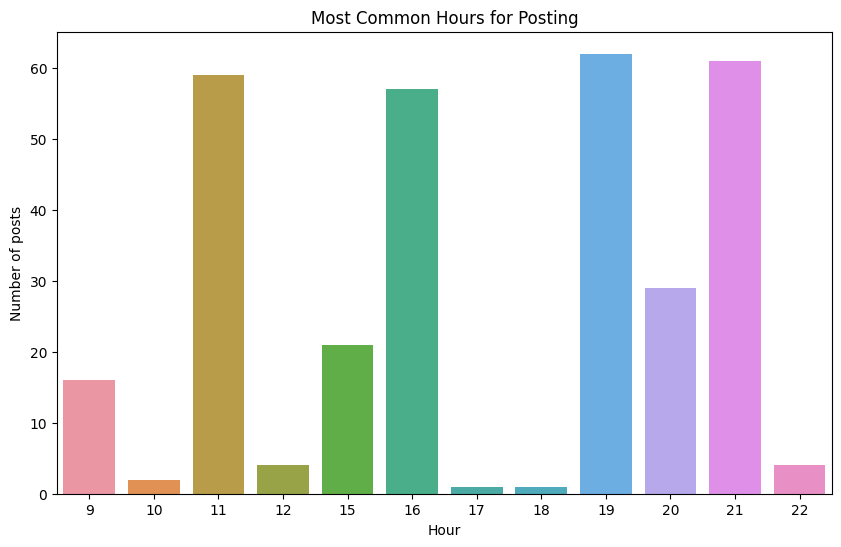

In [18]:
# Extract the hour from the time column
df['hour'] = df['time'].dt.hour

# Count the frequency of each hour
hour_counts = df['hour'].value_counts()

# Plot the most common hours for posting
plt.figure(figsize=(10, 6))
sns.barplot(x=hour_counts.index, y=hour_counts.values)
plt.title('Most Common Hours for Posting')
plt.ylabel('Number of posts')
plt.xlabel('Hour')

Correlation with interaction and posted time

<Axes: >

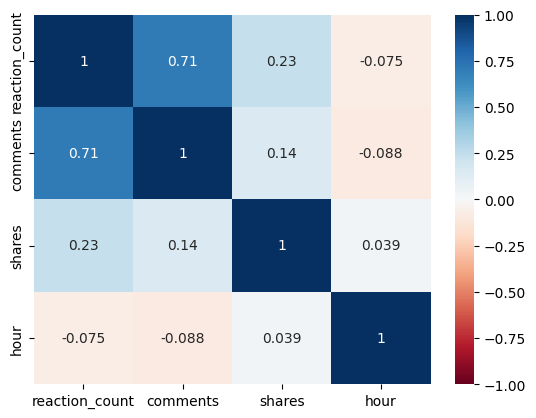

In [19]:
corr = df[['reaction_count', 'comments', 'shares', 'hour']].corr()
sns.heatmap(corr, annot=True, cmap='RdBu', vmin=-1, vmax=1)

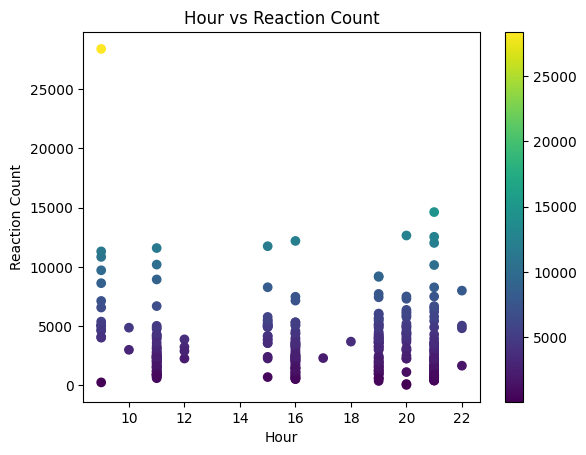

In [20]:
plt.scatter(df['hour'], df['reaction_count'], c=df['reaction_count'])
plt.title('Hour vs Reaction Count')
plt.xlabel('Hour')
plt.ylabel('Reaction Count')
plt.colorbar()

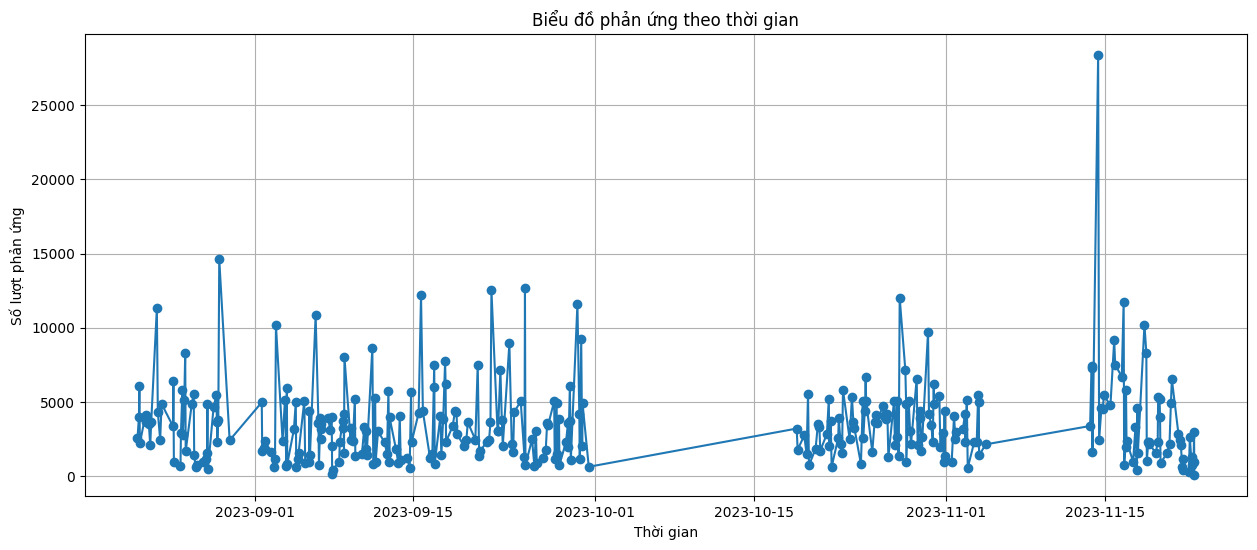

In [21]:
plt.figure(figsize=(15, 6))
plt.plot(df['time'], df['reaction_count'], marker='o',linestyle='-')
plt.title('Biểu đồ phản ứng theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Số lượt phản ứng')
plt.grid(True)
plt.show()



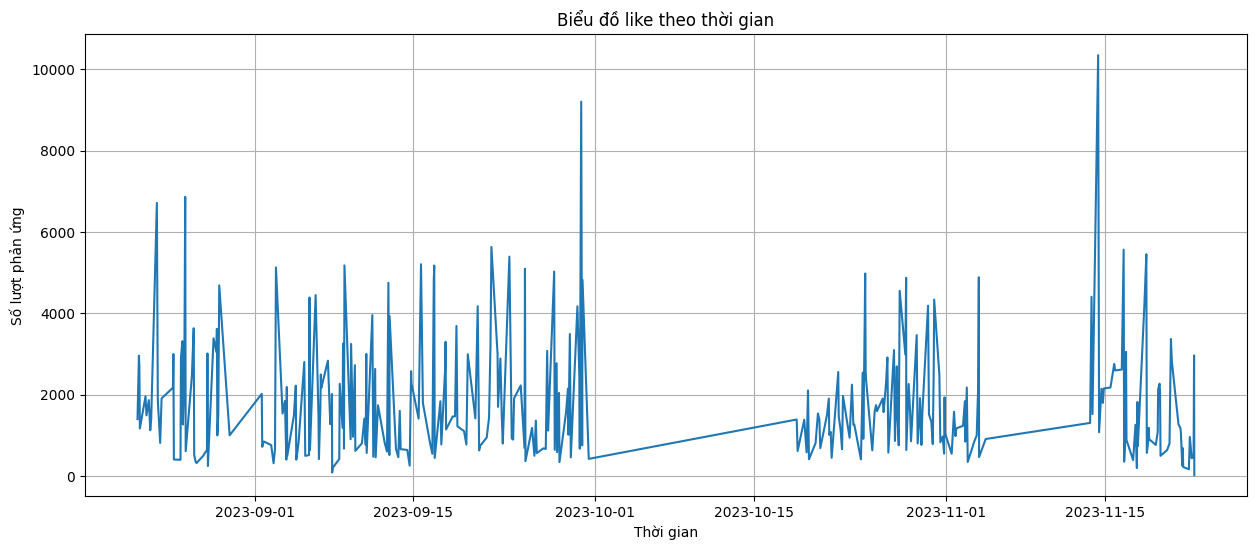

In [22]:

plt.figure(figsize=(15, 6))
plt.plot(df['time'], df['total_likes'],linestyle='-')
plt.title('Biểu đồ like theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Số lượt phản ứng')
plt.grid(True)
plt.show()

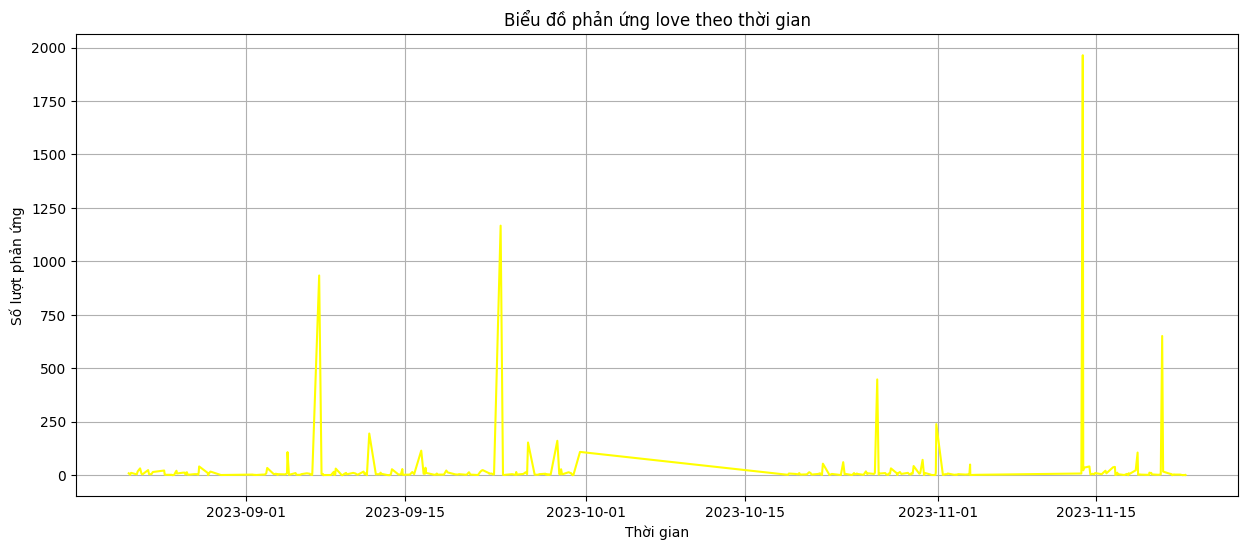

In [23]:
plt.figure(figsize=(15, 6))
plt.plot(df['time'], df[ 'total_loves'],linestyle='-',color='yellow')
plt.title('Biểu đồ phản ứng love theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Số lượt phản ứng')
plt.grid(True)
plt.show()

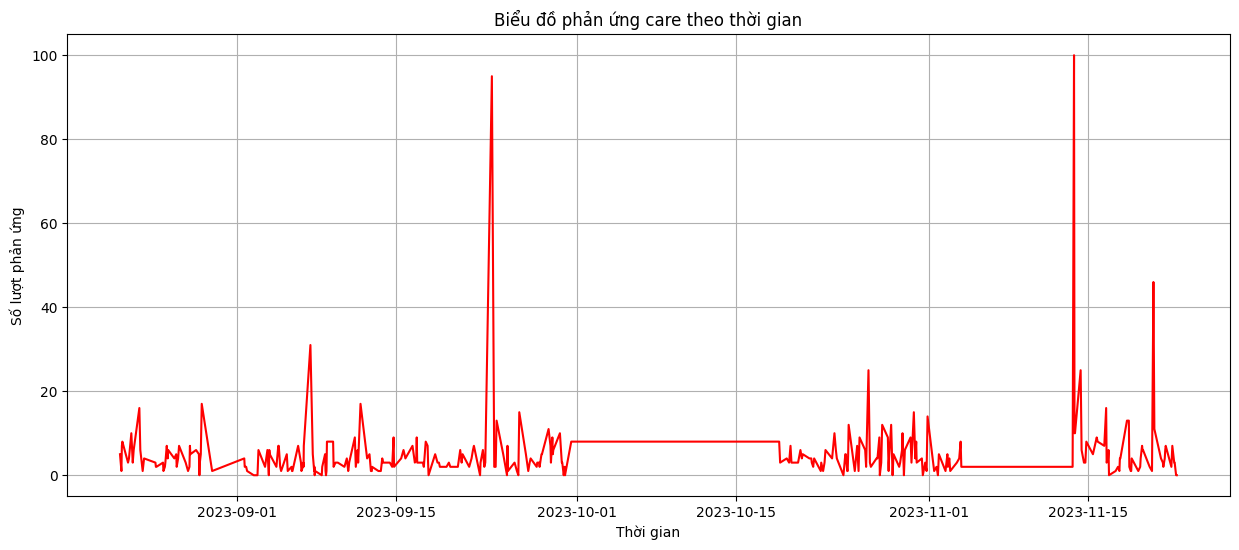

In [24]:
plt.figure(figsize=(15, 6))
plt.plot(df['time'], df[ 'total_cares'],linestyle='-',color='red')
plt.title('Biểu đồ phản ứng care theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Số lượt phản ứng')
plt.grid(True)
plt.show()

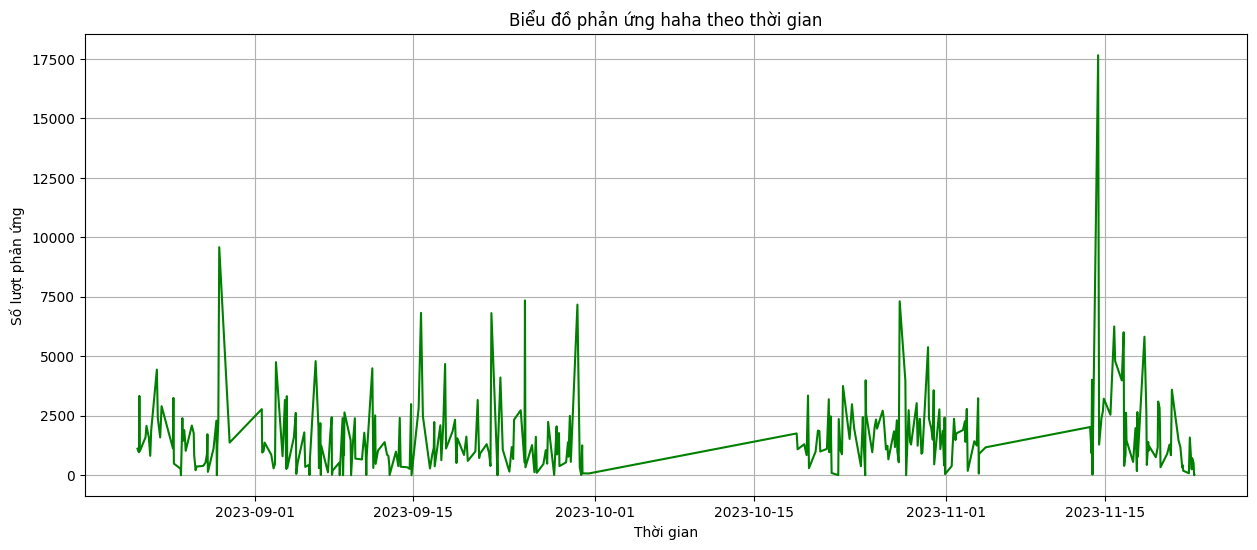

In [25]:
plt.figure(figsize=(15, 6))
plt.plot(df['time'], df['total_hahas'],linestyle='-',color='green',)
plt.title('Biểu đồ phản ứng haha theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Số lượt phản ứng')
plt.grid(True)
plt.show()

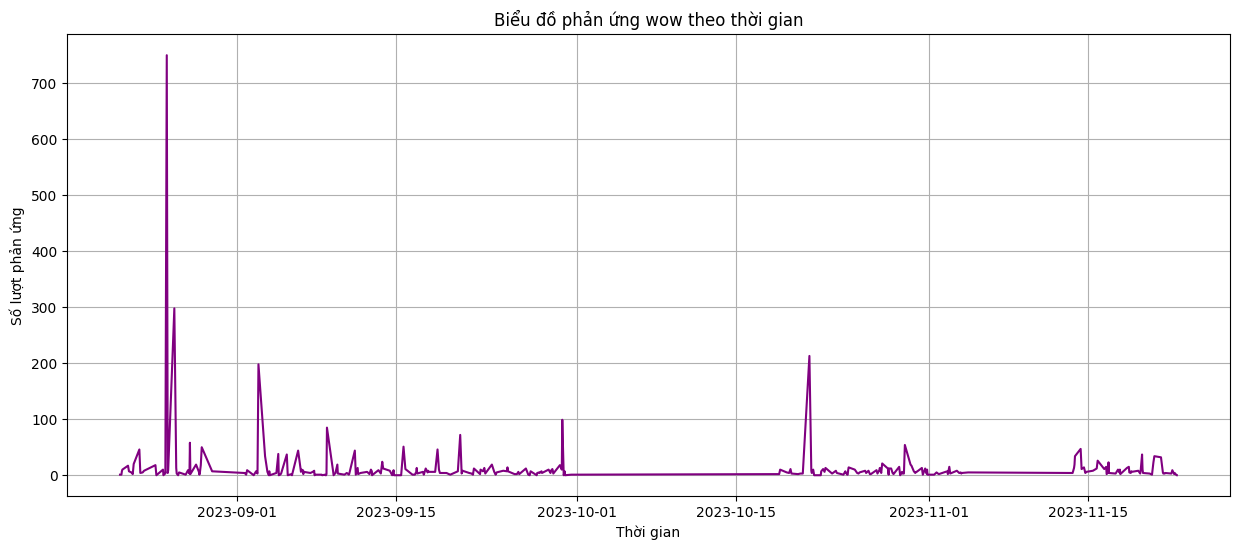

In [26]:
plt.figure(figsize=(15, 6))
plt.plot(df['time'], df[ 'total_wows'],linestyle='-',color='purple')
plt.title('Biểu đồ phản ứng wow theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Số lượt phản ứng')
plt.grid(True)
plt.show()

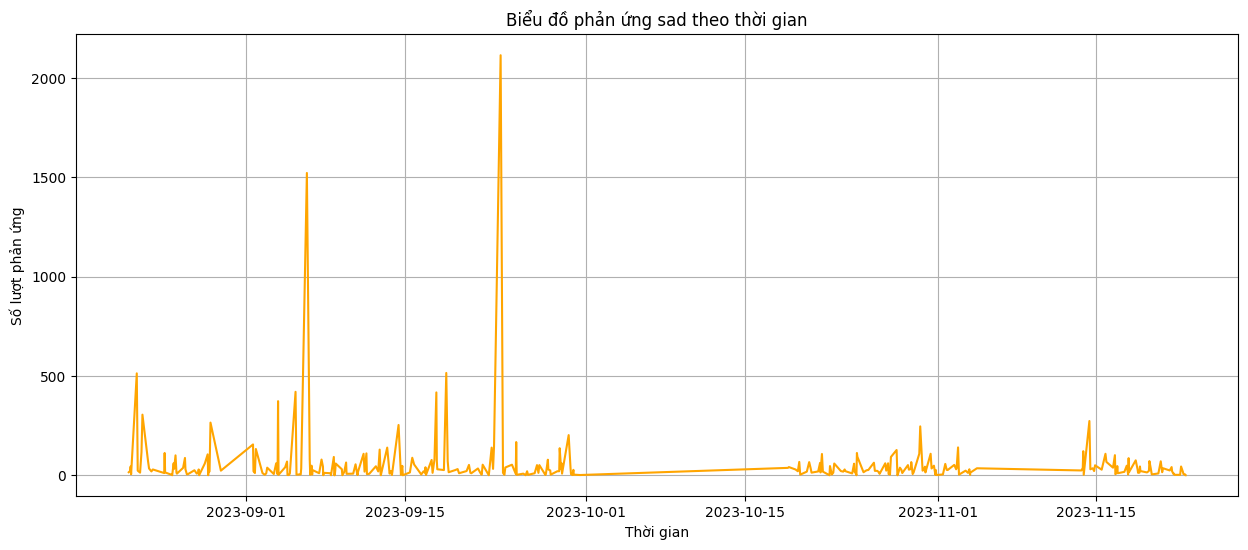

In [27]:
plt.figure(figsize=(15, 6))
plt.plot(df['time'], df[ 'total_sads'],linestyle='-',color='orange')
plt.title('Biểu đồ phản ứng sad theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Số lượt phản ứng')
plt.grid(True)
plt.show()

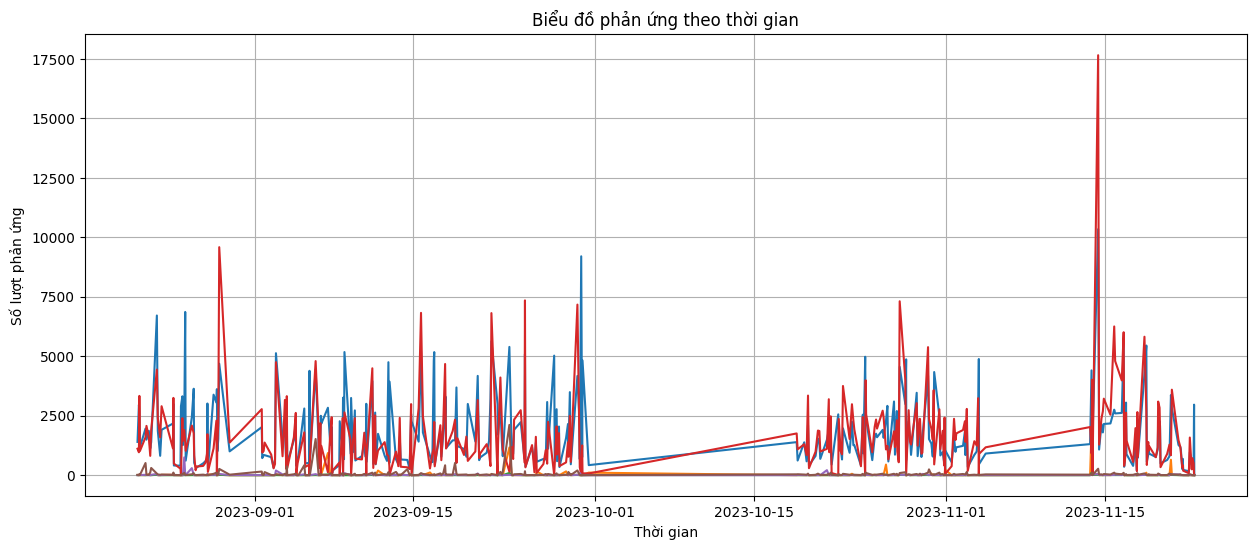

In [28]:
plt.figure(figsize=(15, 6))
plt.plot(df['time'], df[['total_likes', 'total_loves', 'total_cares', 'total_hahas', 'total_wows', 'total_sads']],linestyle='-')
plt.title('Biểu đồ phản ứng theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Số lượt phản ứng')
plt.grid(True)
plt.show()

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

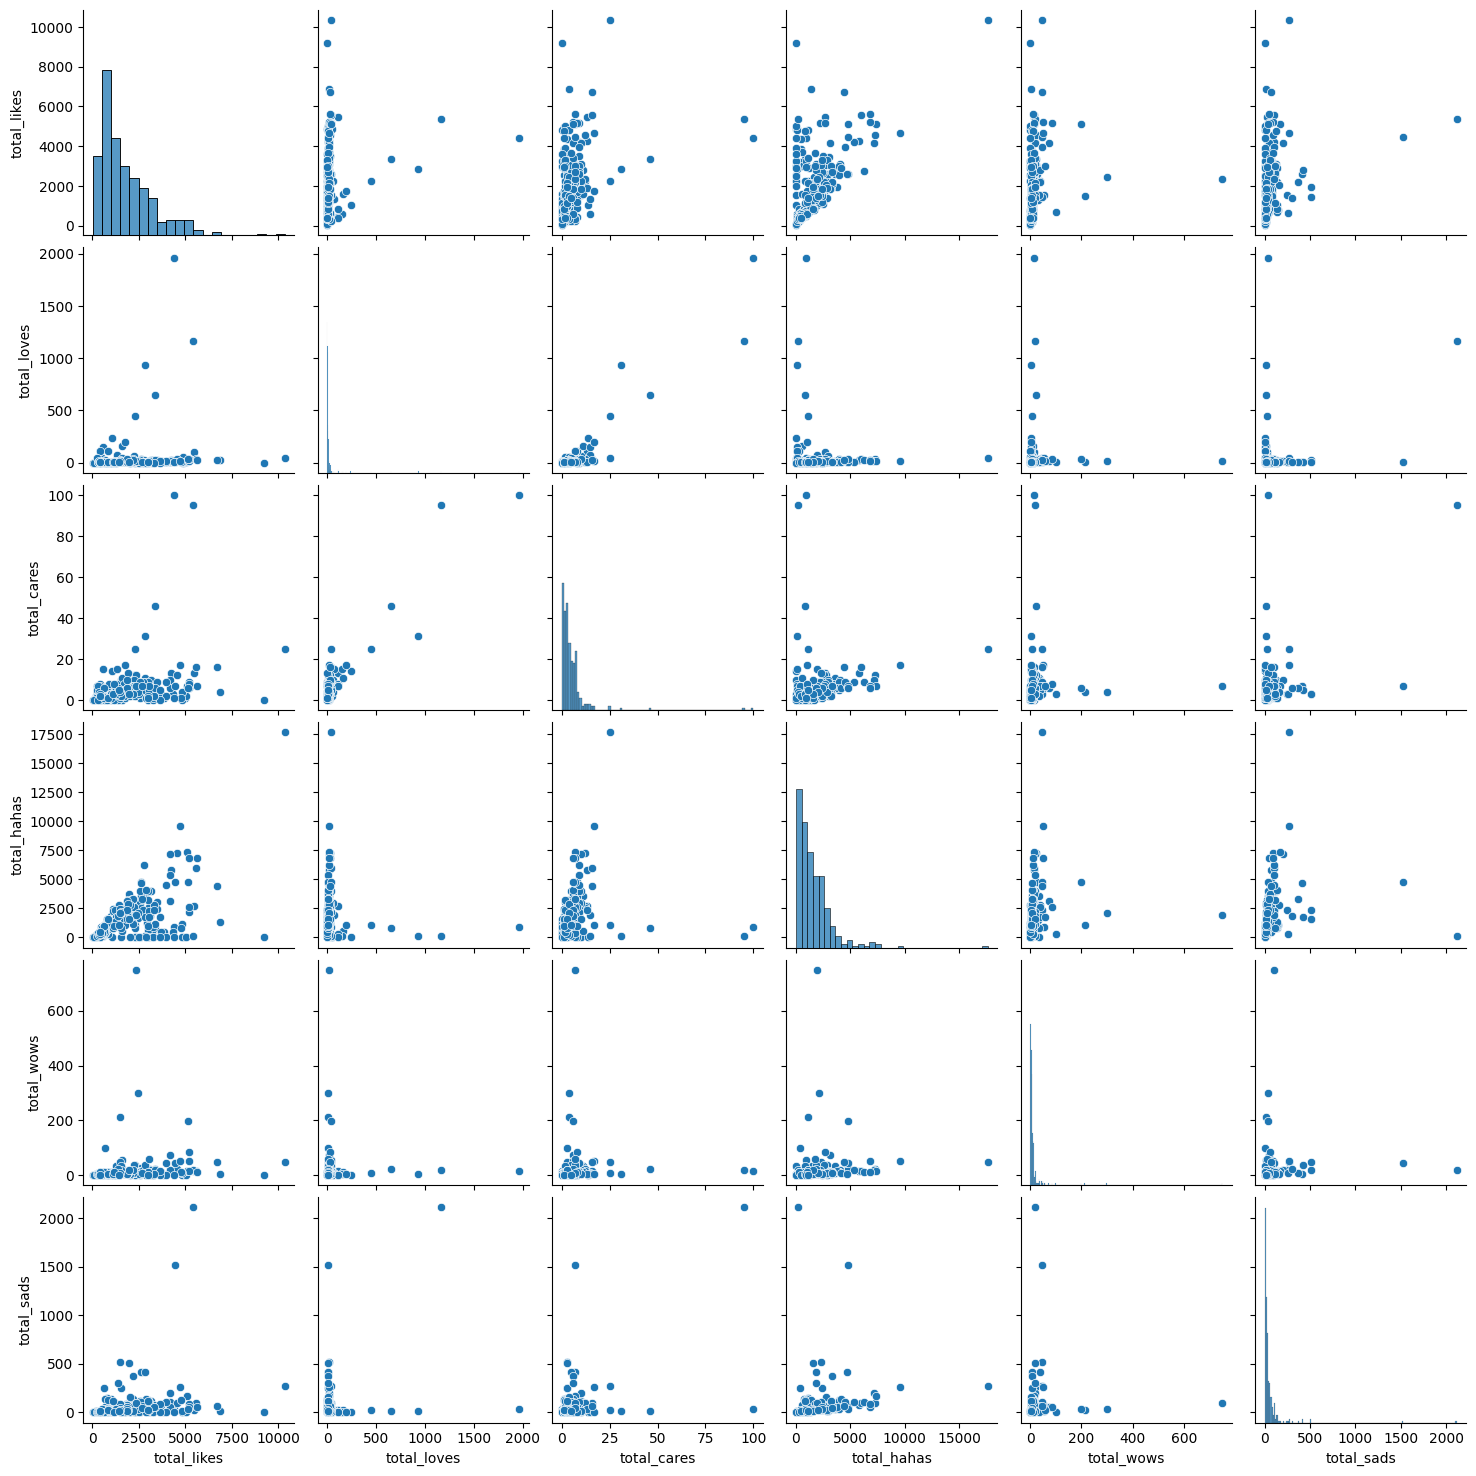

In [29]:
sns.pairplot(df, vars=['total_likes', 'total_loves', 'total_cares', 'total_hahas', 'total_wows', 'total_sads'])

In [30]:
# Đọc dữ liệu từ DataFrame (df)
# (Đảm bảo thay đổi 'df' thành tên của DataFrame của bạn)
comments_df = df[['post_id', 'comments','time']]
# # Tổng số lượng comment
total_comments = comments_df['comments'].sum()
total_comments

# # Số lượng comment trung bình mỗi bài post
average_comments_per_post = total_comments / len(comments_df)

# # Hiển thị kết quả
print(f'Tổng số lượng comment: {total_comments}')
print(f'Số lượng comment trung bình mỗi bài post: {average_comments_per_post}')


Tổng số lượng comment: 32624
Số lượng comment trung bình mỗi bài post: 102.91482649842271


In [31]:
comments_df


,post_id,comments,time
0,894292592055734,3,2023-11-22 20:30:37
1,896394561845537,1,2023-11-22 20:00:01
2,896334455184881,20,2023-11-22 19:00:09
3,896323245186002,27,2023-11-22 16:00:06
4,894292282055765,18,2023-11-22 15:00:44
...,...,...,...
312,846477030170624,194,2023-08-22 09:00:01
313,849250236559970,58,2023-08-21 21:01:32
314,846476696837324,86,2023-08-21 20:00:02
315,849226843228976,37,2023-08-21 19:02:11


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19244\151979087.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_df['date'] = comments_df['time'].dt.date


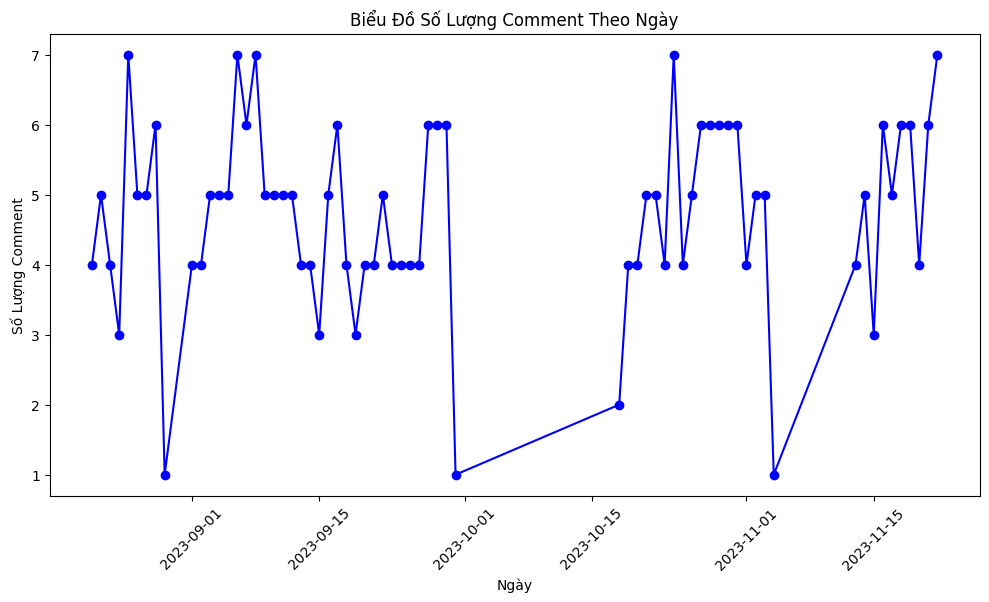

In [32]:
# # # Biểu đồ số lượng comment theo thời gian (nếu có thông tin thời gian)
# # # (Sử dụng 'timestamp' hoặc 'time' nếu có)
# comments_by_time = comments_df.groupby('time').size()
# plt.figure(figsize=(12, 6))
# plt.plot(comments_by_time.index, comments_by_time.values)
# plt.title('Biểu Đồ Số Lượng Comment Theo Thời Gian')
# plt.xlabel('Thời Gian')
# plt.ylabel('Số Lượng Comment')
# plt.show()
# Chuyển đổi cột thời gian thành ngày
comments_df['date'] = comments_df['time'].dt.date

# Nhóm số lượng comment theo ngày
comments_by_date = comments_df.groupby('date').size()

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(comments_by_date.index, comments_by_date.values, marker='o', linestyle='-', color='b')
plt.title('Biểu Đồ Số Lượng Comment Theo Ngày')
plt.xlabel('Ngày')
plt.ylabel('Số Lượng Comment')
plt.xticks(rotation=45)  # Xoay nhãn x để dễ đọc hơn
plt.show()


Number of posts with videos: 238
Number of posts without videos: 79


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19244\3619249860.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['has_video'] = ~df['video_id'].isnull()


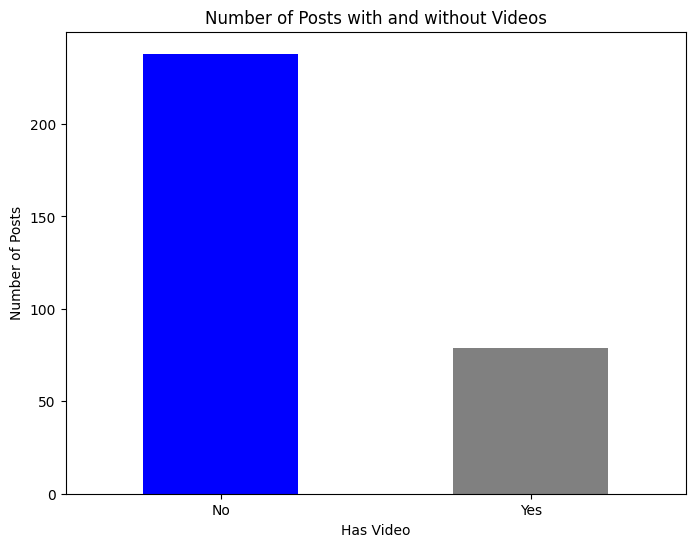

In [33]:

# Assuming 'df' is your DataFrame with a 'video_id' column
# You may need to adjust the column name if it's different in your DataFrame

# Create a new column 'has_video' indicating whether a post has a video or not
df['has_video'] = ~df['video_id'].isnull()

# Count the number of posts with and without videos
video_counts = df['has_video'].value_counts()

# Display the result
print("Number of posts with videos:", video_counts[True])
print("Number of posts without videos:", video_counts[False])

# Alternatively, you can create a bar plot to visualize the information
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
df['has_video'].value_counts().plot(kind='bar', color=['blue', 'gray'])
plt.title('Number of Posts with and without Videos')
plt.xlabel('Has Video')
plt.ylabel('Number of Posts')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.show()


In [34]:
first_row = df.iloc[109]
first_row['reactions']
reactions = first_row['reactions']
reactions["shares"] = first_row['shares']
reactions["comments"] =first_row['comments']
reactions


{'thích': 3838,
 'yêu thích': 4,
 'haha': 495,
 'wow': 1,
 'thương thương': 1,
 'buồn': 8,
 'shares': 13,
 'comments': 41}

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19244\3002065607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = pd.to_datetime(df['time'])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19244\3002065607.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace([np.inf, -np.inf], np.nan, inplace=True)


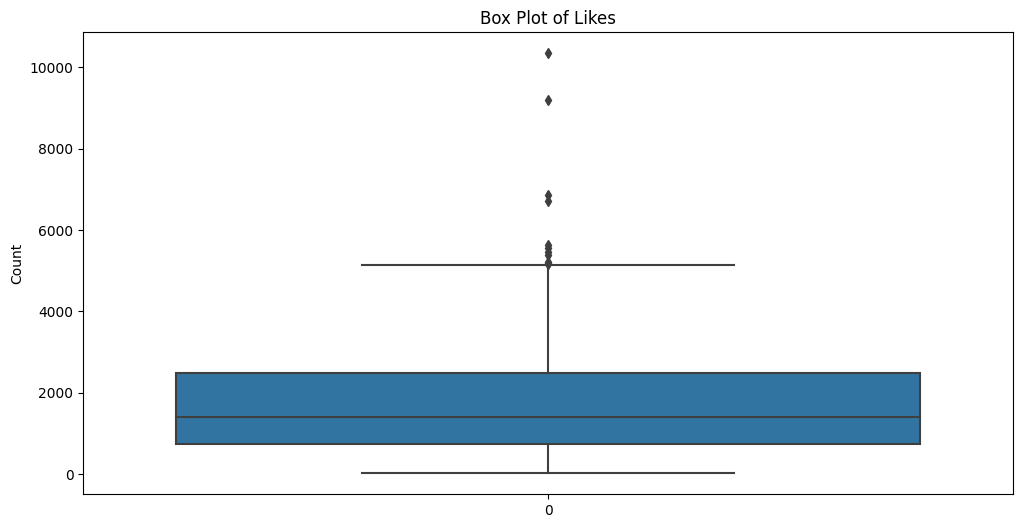

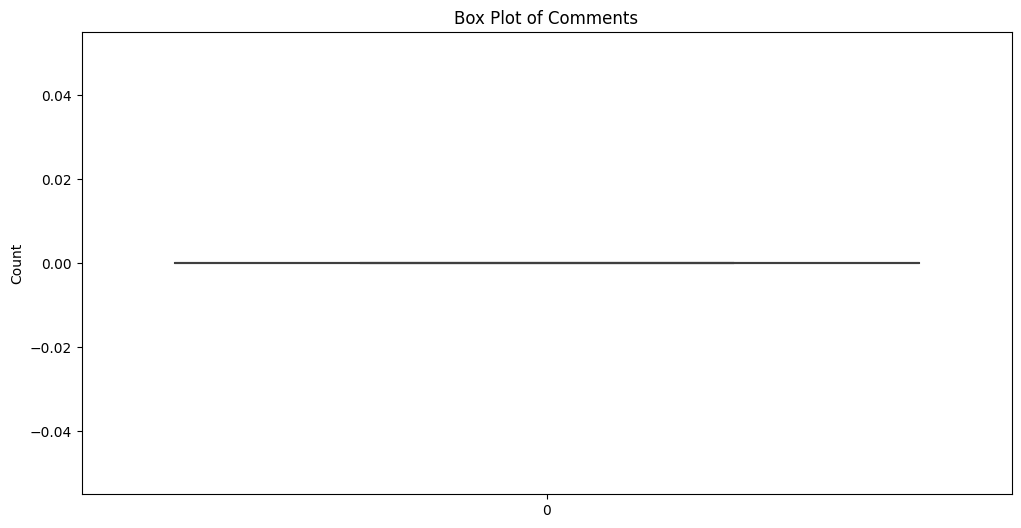

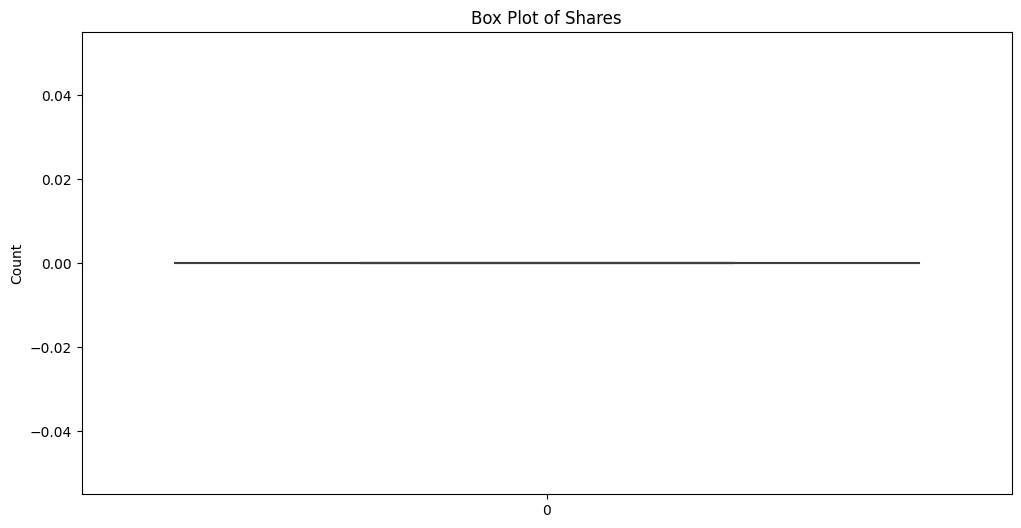

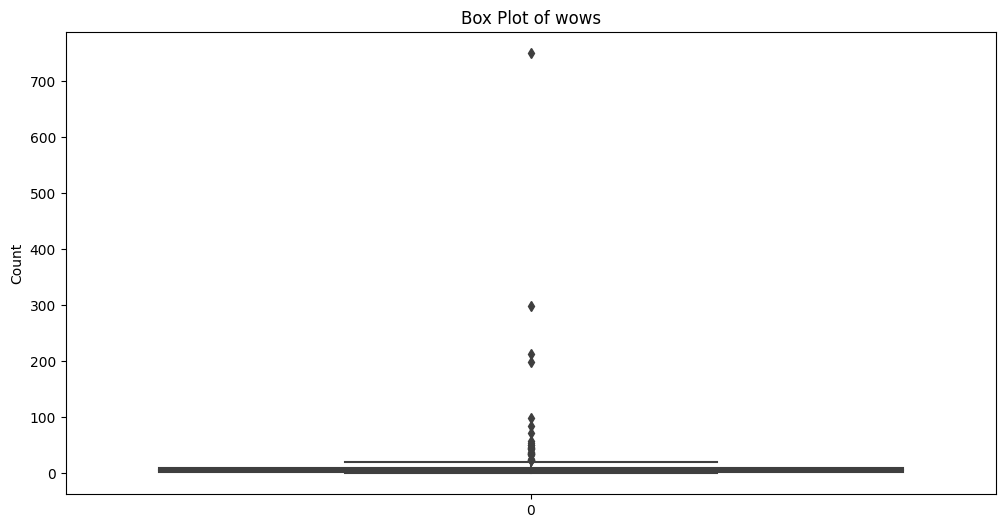

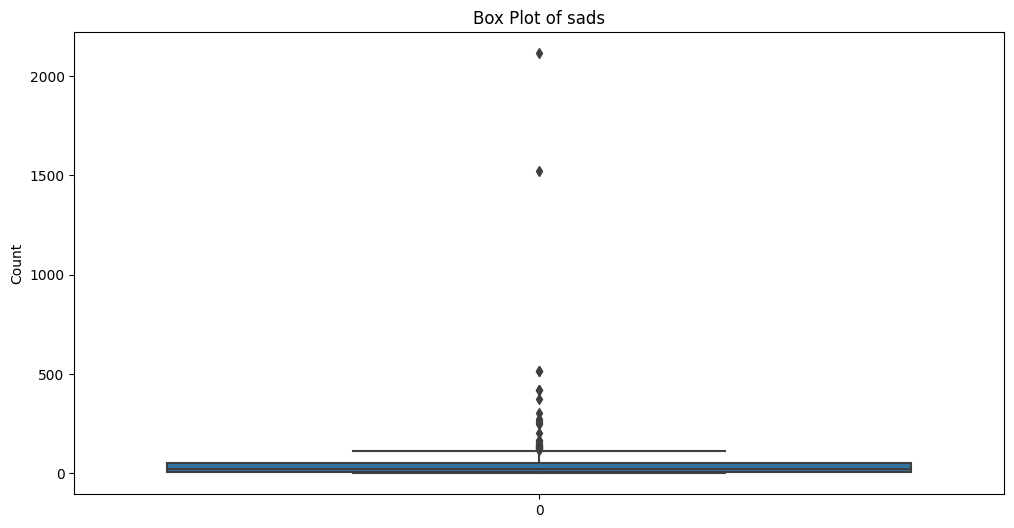

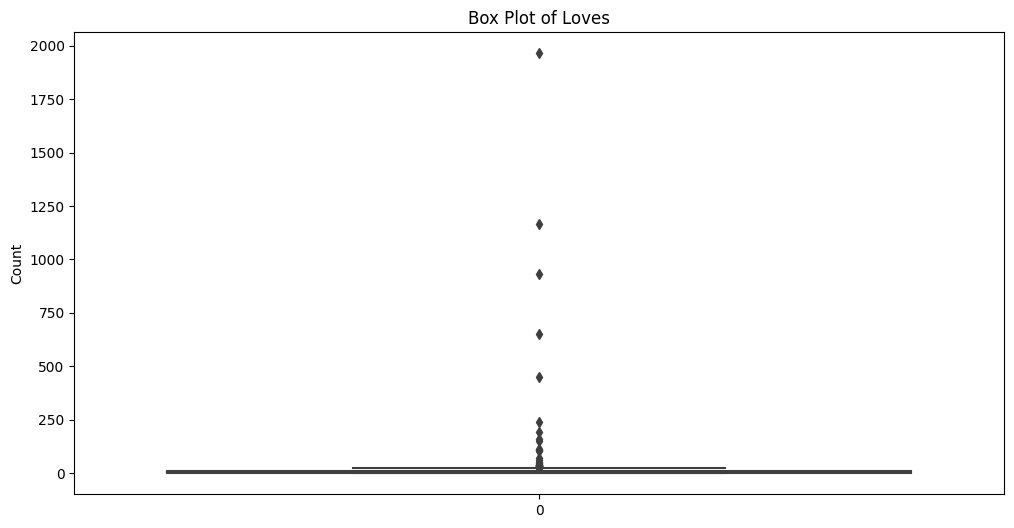

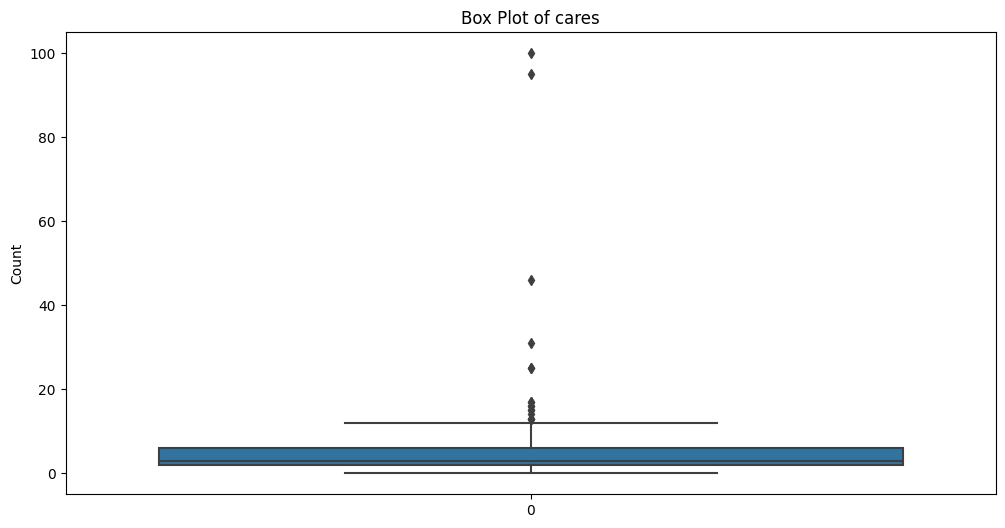

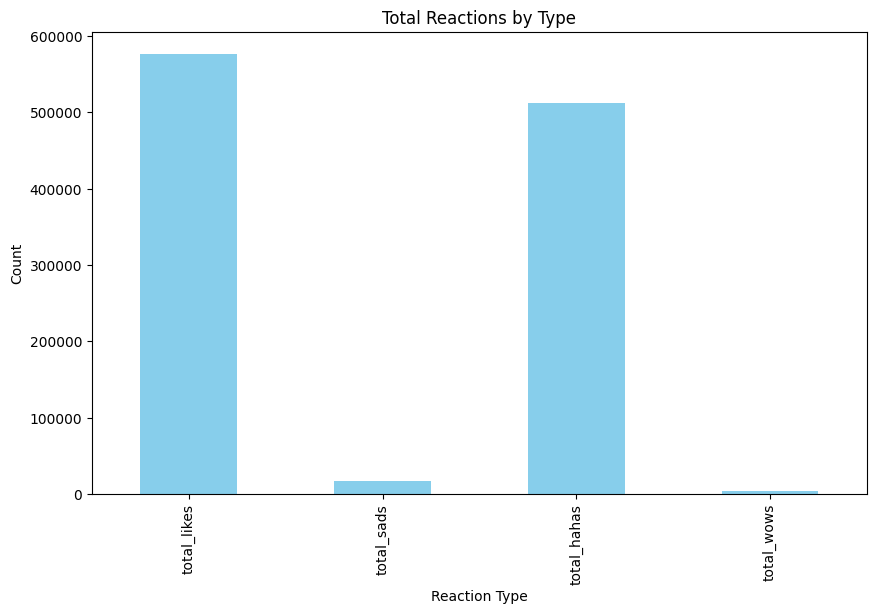

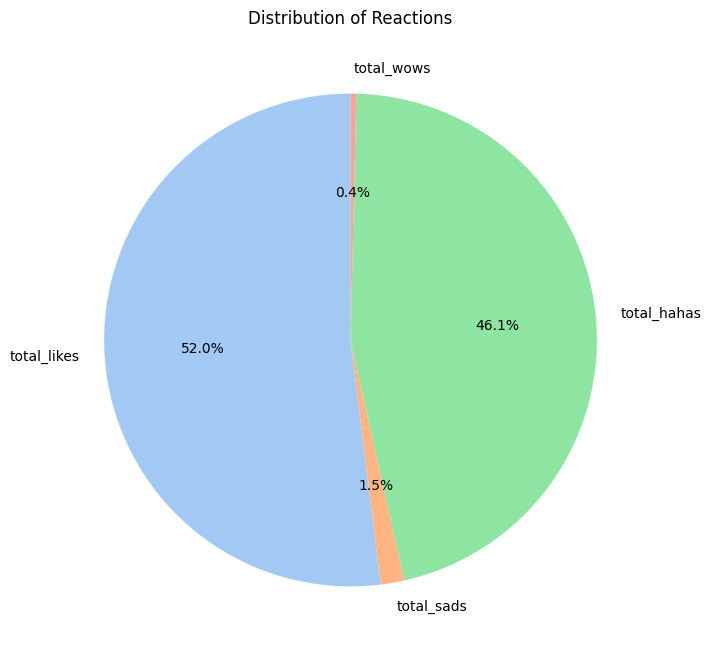

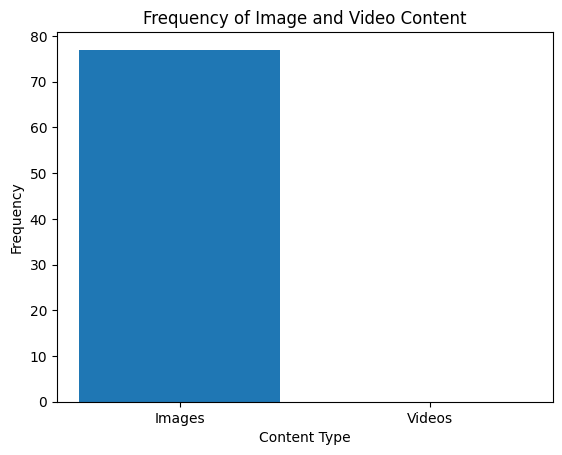

In [35]:
# Chuyển đổi cột 'time' sang định dạng datetime nếu nó chưa phải
df['time'] = pd.to_datetime(df['time'])
# Trước khi thực hiện phép toán, chuyển đổi 'inf' thành 'NaN'
df.replace([np.inf, -np.inf], np.nan, inplace=True)


# Biểu đồ hộp (box plot) để hiển thị phân phối của các tham số
plt.figure(figsize=(12, 6))
sns.boxplot(data=df['total_likes'])
plt.title('Box Plot of Likes')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[ 'total_comments'])
plt.title('Box Plot of Comments')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df['total_shares'])
plt.title('Box Plot of Shares')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df['total_wows'])
plt.title('Box Plot of wows')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df['total_sads'])
plt.title('Box Plot of sads')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df['total_loves'])
plt.title('Box Plot of Loves')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df['total_cares'])
plt.title('Box Plot of cares')
plt.ylabel('Count')
plt.show()

# Phân tích phản ứng theo từng loại
reactions_columns = ['total_likes', 'total_sads', 'total_hahas', 'total_wows']
reactions_sum = df[reactions_columns].sum()

# Vẽ biểu đồ cột cho tổng số phản ứng của từng loại
plt.figure(figsize=(10, 6))
reactions_sum.plot(kind='bar', color='skyblue')
plt.title('Total Reactions by Type')
plt.xlabel('Reaction Type')
plt.ylabel('Count')
plt.show()

# Vẽ biểu đồ tròn cho tỷ lệ phản ứng
plt.figure(figsize=(8, 8))
plt.pie(reactions_sum, labels=reactions_sum.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Reactions')
plt.show()

# Kiểm tra tần suất xuất hiện của hình ảnh và video
image_counts = df['image'].notna().sum()
video_counts = df['images'].apply(lambda x: len(x) if isinstance(x, list) else 0).sum()

# Vẽ biểu đồ cột cho tần suất xuất hiện của hình ảnh và video
plt.bar(['Images', 'Videos'], [image_counts, video_counts])
plt.xlabel('Content Type')
plt.ylabel('Frequency')
plt.title('Frequency of Image and Video Content')
plt.show()


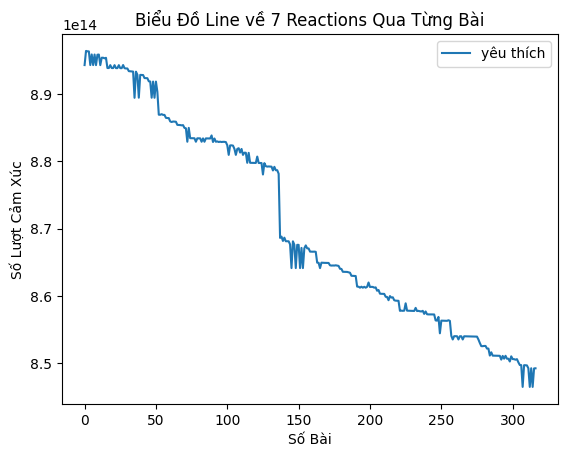

In [36]:
plt.plot(df.index, df.iloc[:,0], label='yêu thích', marker='')

plt.xlabel('Số Bài')
plt.ylabel('Số Lượt Cảm Xúc')
plt.title('Biểu Đồ Line về 7 Reactions Qua Từng Bài')
plt.legend()
plt.show()


## Reactions analysis

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and

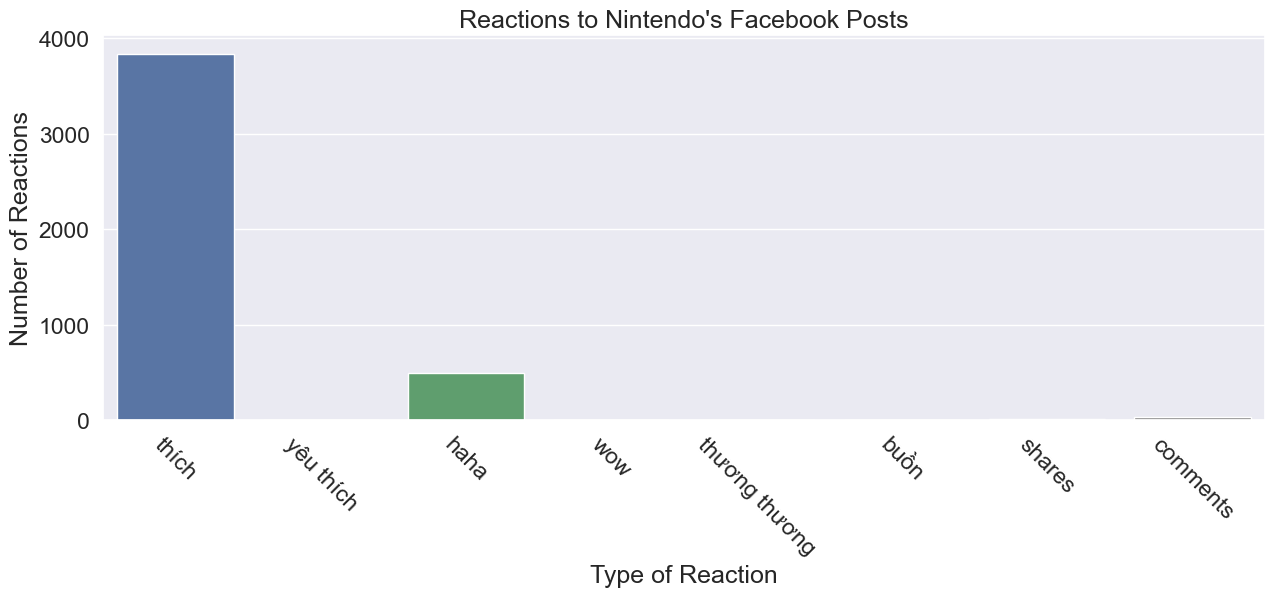

In [37]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,5)})
sns.set(font_scale=1.5)

# plot the reactions
fig, ax = plt.subplots()
ax = sns.barplot(x=list(reactions.keys()), y=list(reactions.values()))
ax.set_title("Reactions to Nintendo's Facebook Posts")
ax.set_ylabel("Number of Reactions")
ax.set_xlabel("Type of Reaction")
plt.xticks(rotation=-45)
plt.show()

## Read all posts

In [38]:
#df_text = post_df_full[['post_id','post_text']]
#df_text= pd.read_csv('Data/anhdaden1.csv').dropna(axis=1,how='all')
text    = str(df['post_text'])

df

,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,images,...,total_sads,total_hahas,total_wows,total_shares,total_comments,total_loves,total_cares,week_day,hour,has_video
0,894292592055734,Cách này hay nè\n#anhdaden,Cách này hay nè\n#anhdaden,NaN,NaN,2023-11-22 20:30:37,1.700660e+09,https://scontent.fhan14-4.fna.fbcdn.net/v/t39....,https://scontent.fhan14-4.fna.fbcdn.net/v/t39....,['https://scontent.fhan14-4.fna.fbcdn.net/v/t3...,...,0,25,0,0,0,1,0,Wednesday,20,False
1,896394561845537,Mới đầu tháng cháy ví cuối tháng lại cháy ví t...,Mới đầu tháng cháy ví cuối tháng lại cháy ví t...,NaN,NaN,2023-11-22 20:00:01,1.700658e+09,https://scontent.fhan14-3.fna.fbcdn.net/v/t39....,https://scontent.fhan14-3.fna.fbcdn.net/v/t39....,['https://scontent.fhan14-3.fna.fbcdn.net/v/t3...,...,0,0,0,0,0,0,0,Wednesday,20,False
2,896334455184881,Hảo xử lý\n#anhdaden,Hảo xử lý\n#anhdaden,NaN,NaN,2023-11-22 19:00:09,1.700654e+09,NaN,https://scontent.fhan14-1.fna.fbcdn.net/v/t15....,[],...,5,510,1,0,0,1,0,Wednesday,19,True
3,896323245186002,Không một động tác thừa\n#anhdaden,Không một động tác thừa\n#anhdaden,NaN,NaN,2023-11-22 16:00:06,1.700644e+09,NaN,https://scontent.fhan14-1.fna.fbcdn.net/v/t15....,[],...,6,717,4,0,0,1,3,Wednesday,16,True
4,894292282055765,Tay nhỏ thì chịu thôi\n#anhdaden,Tay nhỏ thì chịu thôi\n#anhdaden,NaN,NaN,2023-11-22 15:00:44,1.700640e+09,https://scontent.fhan14-1.fna.fbcdn.net/v/t39....,https://scontent.fhan14-1.fna.fbcdn.net/v/t39....,['https://scontent.fhan14-1.fna.fbcdn.net/v/t3...,...,16,248,2,0,0,0,3,Wednesday,15,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,846477030170624,Tội nghiệp bé gái quá\n#anhdaden,Tội nghiệp bé gái quá\n#anhdaden,NaN,NaN,2023-08-22 09:00:01,1.692670e+09,https://scontent.fhan14-4.fna.fbcdn.net/v/t39....,https://scontent.fhan14-4.fna.fbcdn.net/v/t39....,['https://scontent.fhan14-4.fna.fbcdn.net/v/t3...,...,513,1596,17,0,0,4,3,Tuesday,9,False
313,849250236559970,Chất khỏi bàn\n#anhdaden,Chất khỏi bàn\n#anhdaden,NaN,NaN,2023-08-21 21:01:32,1.692626e+09,NaN,https://scontent.fhan14-1.fna.fbcdn.net/v/t15....,[],...,5,1012,10,0,0,11,8,Monday,21,True
314,846476696837324,Hai con này quá báo rồi\n#anhdaden,Hai con này quá báo rồi\n#anhdaden,NaN,NaN,2023-08-21 20:00:02,1.692623e+09,https://scontent.fhan14-2.fna.fbcdn.net/v/t39....,https://scontent.fhan14-2.fna.fbcdn.net/v/t39....,['https://scontent.fhan14-2.fna.fbcdn.net/v/t3...,...,44,3334,7,0,0,8,7,Monday,20,False
315,849226843228976,Người tốt thế mà :))\n#anhdaden,Người tốt thế mà :))\n#anhdaden,NaN,NaN,2023-08-21 19:02:11,1.692619e+09,NaN,https://scontent.fhan14-1.fna.fbcdn.net/v/t15....,[],...,22,964,1,0,0,2,1,Monday,19,True


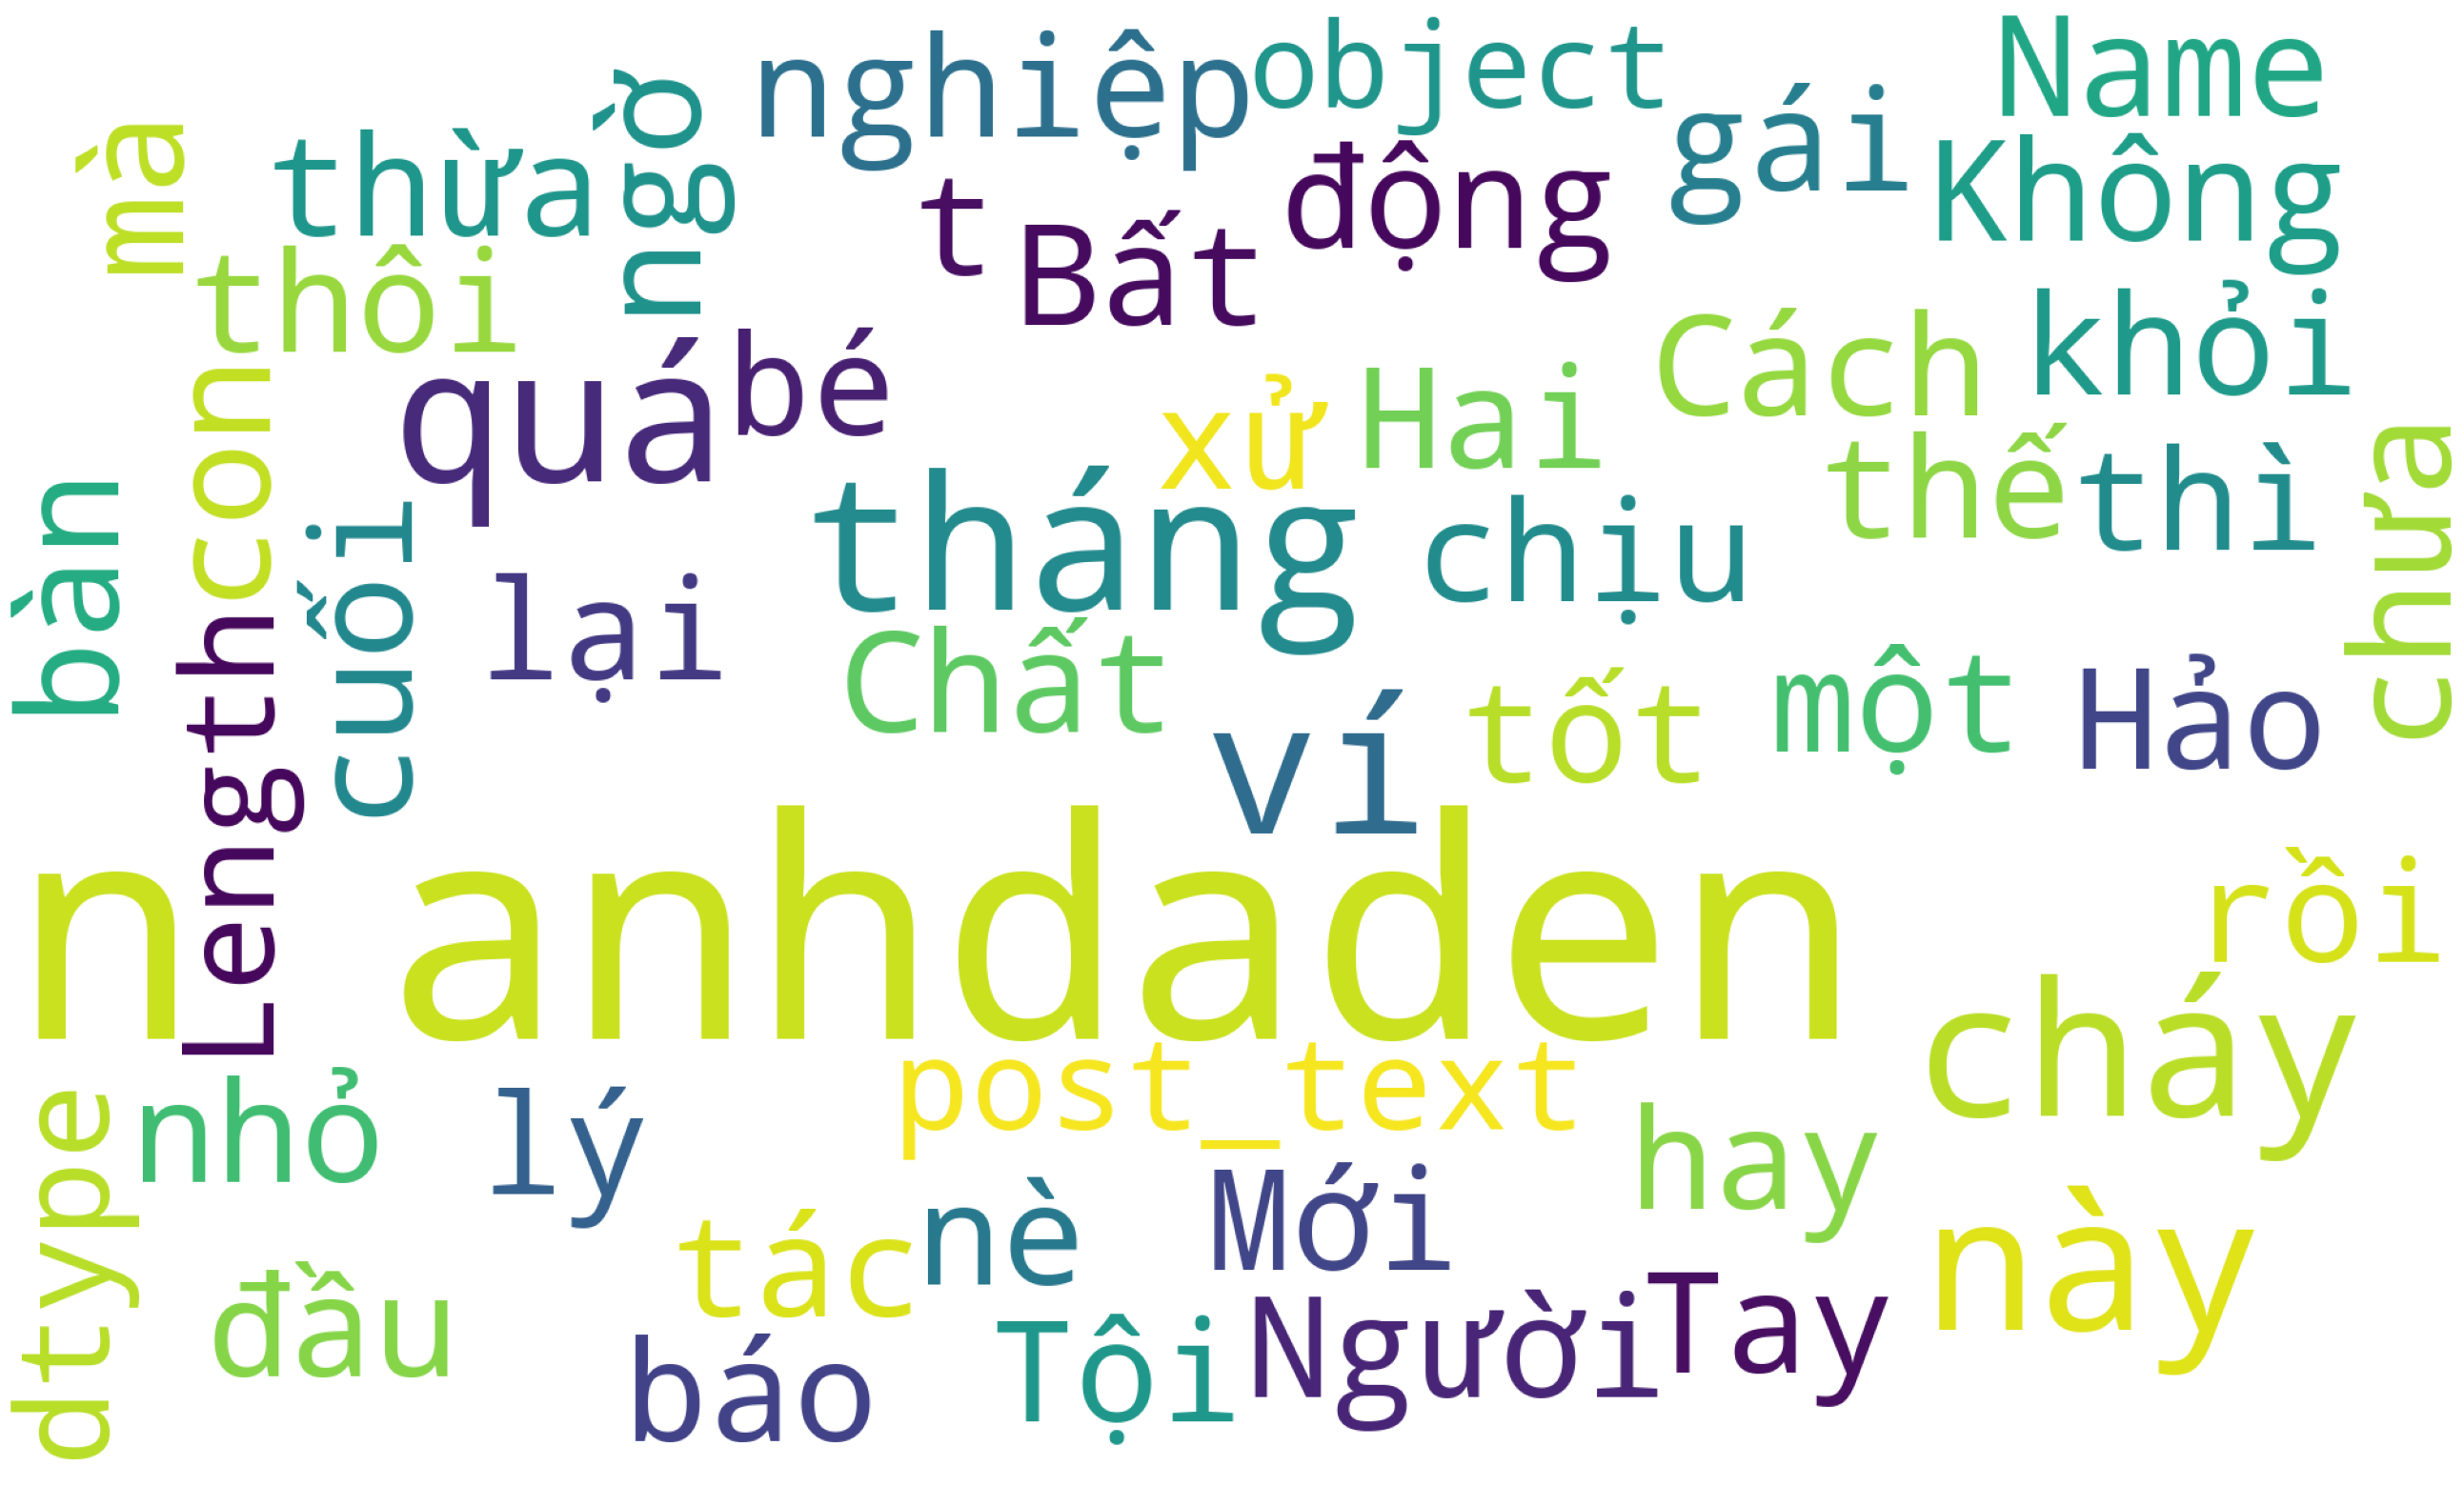

In [39]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()